#### Q1) Delivery_time -> Predict delivery time using sorting time 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


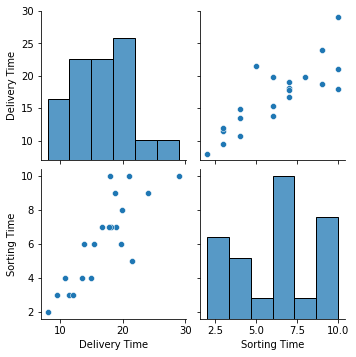

In [6]:
sns.pairplot(data)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

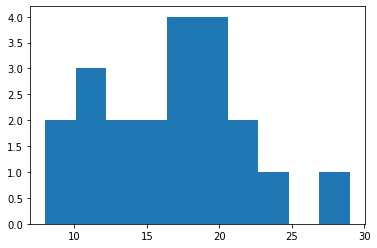

In [8]:
plt.hist(data['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

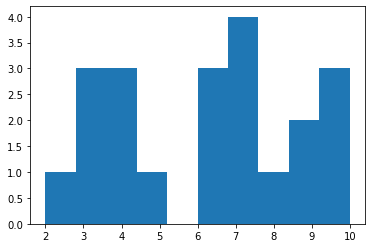

In [9]:
plt.hist(data['Sorting Time'])

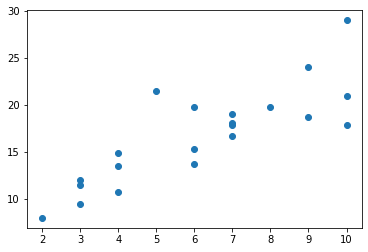

In [10]:
plt.scatter(data['Sorting Time'],data['Delivery Time'])

In [11]:
X = data['Delivery Time'].values.reshape(21,1)
X

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [12]:
Y = data['Sorting Time'].values.reshape(21,1)
Y

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [13]:
LR = LinearRegression()

In [14]:
model = LR.fit(Y ,X)

In [15]:
model.coef_

array([[1.6490199]])

In [16]:
model.intercept_

array([6.58273397])

##### So , The Equation becomes Y = 1.6490199 * X + 6.58273397

In [17]:
prediction = model.predict(X)
prediction

array([[41.21215181],
       [28.84450258],
       [39.15087693],
       [46.1592115 ],
       [54.40431098],
       [31.89518939],
       [37.91411201],
       [22.24842299],
       [36.10019013],
       [37.50185704],
       [39.28279853],
       [24.30969786],
       [34.08838585],
       [25.54646279],
       [26.42044333],
       [31.12015004],
       [29.25675755],
       [36.4464843 ],
       [19.77489315],
       [35.98475873],
       [42.03666175]])

In [18]:
pd.DataFrame({'Sorting Time':Y.flatten(),
              'Delivery Time':X.flatten(),
              'Predictions':prediction.flatten()})

,Sorting Time,Delivery Time,Predictions
0,10,21.00,41.212152
1,4,13.50,28.844503
2,6,19.75,39.150877
3,9,24.00,46.159211
4,10,29.00,54.404311
5,6,15.35,31.895189
6,7,19.00,37.914112
7,3,9.50,22.248423
8,10,17.90,36.100190
9,9,18.75,37.501857


#### Q2) Salary_hike -> Build a prediction model for Salary_hike

In [19]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [20]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


##### As We can see the higher the correaltion better the model
##### This time we will build model with statsmodels.formula.api library

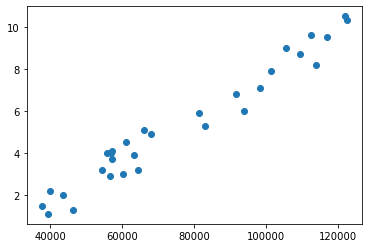

In [21]:
plt.scatter(data['Salary'],data['YearsExperience'])

##### We can see positive correlation

In [22]:
model = smf.ols("Salary~YearsExperience", data = data).fit()

In [23]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [24]:
predictions = model.predict(data)
predictions

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

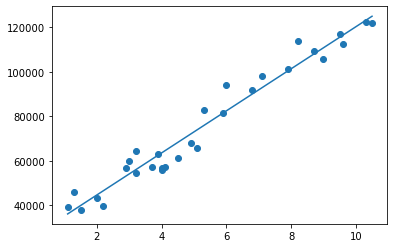

In [25]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.plot(data['YearsExperience'],predictions)

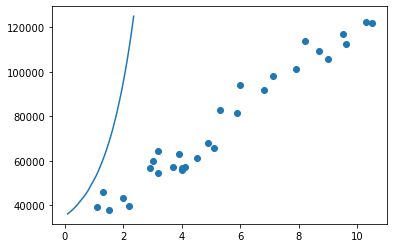

In [26]:
# if we try using log we will get 
plt.scatter(data['YearsExperience'],data['Salary'])
plt.plot(np.log(data['YearsExperience']),predictions)

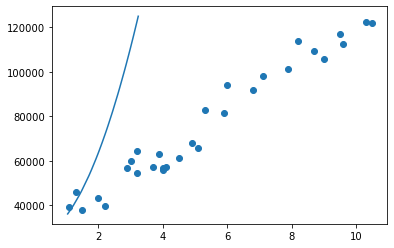

In [32]:
# if we try using sqrt we will get 
plt.scatter(data['YearsExperience'],data['Salary'])
plt.plot(np.sqrt(data['YearsExperience']),predictions)

In [27]:
data1 = data
data1['Predictions'] = predictions
data1

,YearsExperience,Salary,Predictions
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        17:15:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""